# Explore 🔎 data...

Lets see what annotation and images we have :)

In [1]:
! ls -l /home/jirka/Datasets/herbarium-2022-fgvc9

total 676144
-rw-rw-r--   1 jirka jirka   1999585 Feb 12 19:06 sample_submission.csv
drwxrwxr-x 226 jirka jirka      4096 May  1 22:32 test_images
-rw-rw-r--   1 jirka jirka  23275074 Feb 12 21:56 test_metadata.json
drwxrwxr-x 158 jirka jirka      4096 May  1 23:34 train_images
-rw-rw-r--   1 jirka jirka 667077112 Feb 13 02:27 train_metadata.json


### Loading the train and test meta

In [2]:
%matplotlib inline

import os
import json
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pprint import pprint

sn.set()

PATH_DATASET = "/home/jirka/Datasets/herbarium-2022-fgvc9"

with open(os.path.join(PATH_DATASET, "train_metadata.json")) as fp:
    train_data = json.load(fp)

with open(os.path.join(PATH_DATASET, "test_metadata.json")) as fp:
    test_data = json.load(fp)

pprint(train_data.keys())
pprint(len(test_data))

dict_keys(['annotations', 'images', 'categories', 'genera', 'institutions', 'distances', 'license'])
210407


### Brief visualisations

,genus_id,institution_id,category_id,image_id
0,1,0,0,00000__001
1,1,0,0,00000__002
2,1,0,0,00000__003


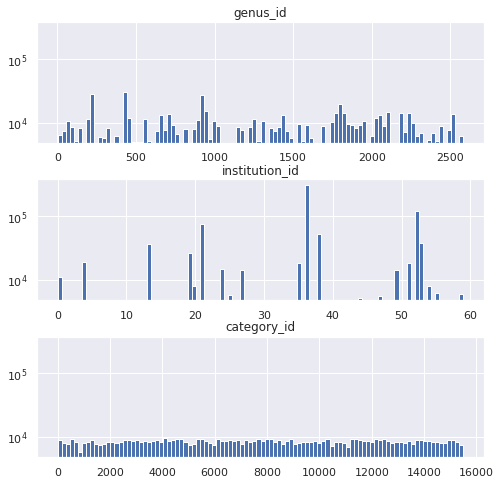

In [3]:
train_annotations = pd.DataFrame(train_data['annotations'])
display(train_annotations.head(3))

axs = train_annotations[["genus_id", "institution_id", "category_id"]].hist(bins=100, sharey=True, figsize=(8, 8), grid=True, layout=(3, 1))
_= [ax.set_yscale('log') for ax in axs[0]]

In [4]:
train_categories = pd.DataFrame(train_data['categories']).set_index("category_id")
display(train_categories.head())
# (train_categories.index - train_categories.category_id).hist()

,scientificName,family,genus,species,authors
category_id,,,,,
0,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,(Douglas ex Loudon) J.Forbes
1,Abies balsamea (L.) Mill.,Pinaceae,Abies,balsamea,(L.) Mill.
2,Abies bracteata (D.Don) Poit.,Pinaceae,Abies,bracteata,(D.Don) Poit.
3,Abies concolor (Gordon & Glend.) Lindl. ex Hil...,Pinaceae,Abies,concolor,(Gordon & Glend.) Lindl. ex Hildebr.
4,Abies fraseri (Pursh) Poir.,Pinaceae,Abies,fraseri,(Pursh) Poir.


In [5]:
train_genera = pd.DataFrame(train_data['genera']).set_index("genus_id")
display(train_genera.head().T)

genus_id,1,2,3,4,5
genus,Abies,Abronia,Abuta,Abutilon,Acaciella


In [6]:
train_institutions = pd.DataFrame(train_data['institutions']).set_index("institution_id")
display(train_institutions.head().T)

institution_id,0,1,2,3,4
collectionCode,A,AMES,ARCH,ASC,ASU


In [7]:
train_images = pd.DataFrame(train_data['images']).set_index("image_id")
display(train_images.head().T)

image_id,00000__001,00000__002,00000__003,00000__004,00000__005
file_name,000/00/00000__001.jpg,000/00/00000__002.jpg,000/00/00000__003.jpg,000/00/00000__004.jpg,000/00/00000__005.jpg
license,0,0,0,0,0


,0,1,2,3,4
genus_id_x,2508.000000,2508.000000,2508.000000,2508.000000,2508.000000
genus_id_y,2576.000000,2518.000000,2566.000000,2552.000000,2550.000000
distance,0.032563,0.025407,0.028041,0.027432,0.025589


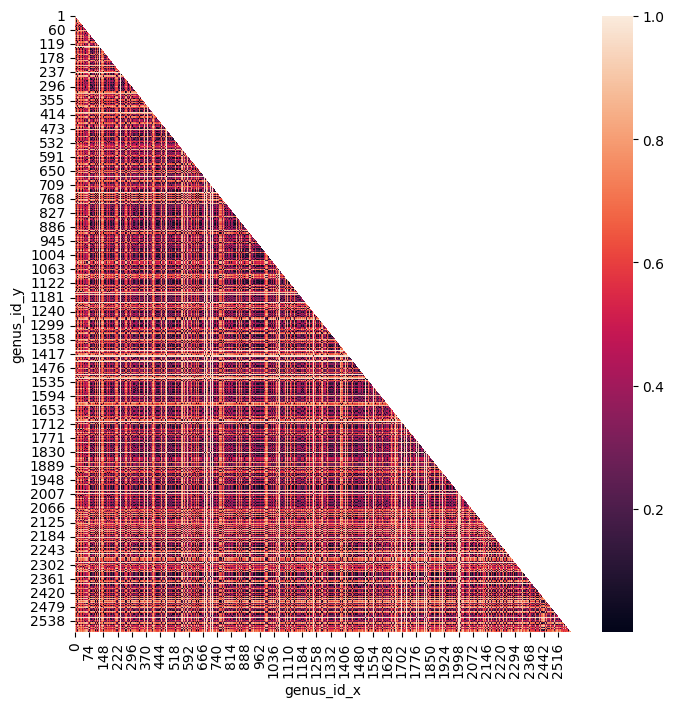

In [29]:
train_distances = pd.DataFrame(train_data['distances'])
display(train_distances.head().T)

fig = plt.figure(figsize=(8, 8))
heat = train_distances.pivot(index="genus_id_y", columns="genus_id_x", values="distance")
_= sn.heatmap(heat, ax=fig.gca())

### Fused annotaions

In [9]:
df_train = pd.merge(train_annotations, train_images, how="left", right_index=True, left_on="image_id")
df_train = pd.merge(df_train, train_categories, how="left", right_index=True, left_on="category_id")
df_train = pd.merge(df_train, train_institutions, how="left", right_index=True, left_on="institution_id")
# df_train = pd.merge(df_train, train_genera, how="left", right_index=True, left_on="genus_id")

display(df_train.head())
print(f"training images: {len(df_train)}")

,genus_id,institution_id,category_id,image_id,file_name,license,scientificName,family,genus,species,authors,collectionCode
0,1,0,0,00000__001,000/00/00000__001.jpg,0,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,(Douglas ex Loudon) J.Forbes,A
1,1,0,0,00000__002,000/00/00000__002.jpg,0,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,(Douglas ex Loudon) J.Forbes,A
2,1,0,0,00000__003,000/00/00000__003.jpg,0,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,(Douglas ex Loudon) J.Forbes,A
3,1,0,0,00000__004,000/00/00000__004.jpg,0,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,(Douglas ex Loudon) J.Forbes,A
4,1,0,0,00000__005,000/00/00000__005.jpg,0,Abies amabilis (Douglas ex Loudon) J.Forbes,Pinaceae,Abies,amabilis,(Douglas ex Loudon) J.Forbes,A


training images: 839772


## Sample images 

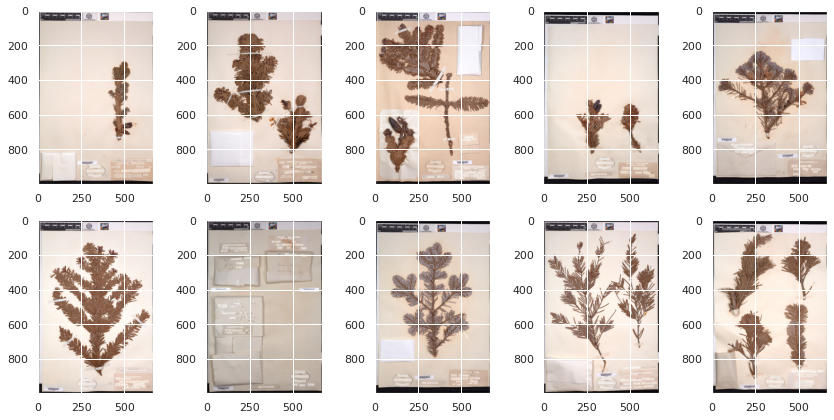

In [10]:
# shuffle
df_train.sample(frac=1)

fig, axarr = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, (_, row) in enumerate(df_train[:10].iterrows()):
    img_path = os.path.join(PATH_DATASET, "train_images", row["file_name"])
    img = plt.imread(img_path)
    axarr[i // 5, i % 5].imshow(img)
#     print(row)
fig.tight_layout()

In [11]:
import glob
import numpy as np
from tqdm.auto import tqdm
from joblib import Parallel, delayed

def _color_means(img_path):
    img = plt.imread(img_path)
    means = {i: np.mean(img[..., i]) / 255.0 for i in range(3)}
    std = {i: np.std(img[..., i]) / 255.0 for i in range(3)}
    return means, std

images = glob.glob(os.path.join(PATH_DATASET, "train_images", "*", "*", "*.jpg"))
# images += glob.glob(os.path.join(PATH_DATASET, "test_images", "*", "*.jpg"))
clr_mean_std = Parallel(n_jobs=os.cpu_count())(delayed(_color_means)(fn) for fn in tqdm(images))

  0%|          | 0/839772 [00:00<?, ?it/s]

In [12]:
img_color_mean = pd.DataFrame([c[0] for c in clr_mean_std]).describe()
display(img_color_mean.T)
img_color_std = pd.DataFrame([c[1] for c in clr_mean_std]).describe()
display(img_color_std.T)

img_color_mean = list(img_color_mean.T["mean"])
img_color_std = list(img_color_std.T["mean"])
print(img_color_mean, img_color_std)

,count,mean,std,min,25%,50%,75%,max
0,839772.0,0.778323,0.066482,0.023649,0.741492,0.788527,0.822019,0.994367
1,839772.0,0.756589,0.074601,0.022106,0.711957,0.769295,0.809102,0.994187
2,839772.0,0.709732,0.092381,0.011244,0.659036,0.724380,0.774888,0.989756


,count,mean,std,min,25%,50%,75%,max
0,839772.0,0.246623,0.070419,0.040573,0.186356,0.274944,0.304157,0.421462
1,839772.0,0.250662,0.069704,0.041769,0.192145,0.277717,0.306960,0.420949
2,839772.0,0.253804,0.067603,0.019950,0.200154,0.275407,0.307385,0.430039


[0.7783228959039067, 0.7565887370928367, 0.7097317558762256] [0.2466228233561865, 0.2506621644081868, 0.253804044909472]


# Training with Lightning⚡Flash

**Follow the example:** https://lightning-flash.readthedocs.io/en/stable/reference/image_classification.html


**Later you would need to adjust the image size to used model:**

| **Base model** | resolution |
|----------------|------------|
| EfficientNetB0 | 224        |
| EfficientNetB1 | 240        |
| EfficientNetB2 | 260        |
| EfficientNetB3 | 300        |
| EfficientNetB4 | 380        |
| EfficientNetB5 | 456        |
| EfficientNetB6 | 528        |
| EfficientNetB7 | 600        |

In [13]:
# !pip install -q effdet 'lightning-flash[image]'
# !pip install -q "pytorch-lightning==1.4.*"

In [14]:
# !pip download -q effdet "icevision[all]" 'lightning-flash[image]' --dest frozen_packages --prefer-binary
# !rm frozen_packages/torch-*
# !ls -l frozen_packages

In [15]:
import torch

import flash
from flash.core.data.utils import download_data
from flash.image import ImageClassificationData, ImageClassifier

## 1. Create the DataModule 🗄️

In [16]:
from dataclasses import dataclass
from torchvision import transforms as T
from typing import Tuple, Callable
from flash.core.data.io.input_transform import InputTransform

@dataclass
class ImageClassificationInputTransform(InputTransform):

    image_size: Tuple[int, int] = (224, 224)
    image_color_mean: Tuple[float, float] = (0.781, 0.759, 0.710)
    image_color_std: Tuple[float, float] = (0.241, 0.245, 0.249)

    def input_per_sample_transform(self):
        return T.Compose([
            T.ToTensor(),
            T.Resize(self.image_size),
            T.Normalize(self.image_color_mean, self.image_color_std),
        ])

    def train_input_per_sample_transform(self):
        return T.Compose([
            T.ToTensor(),
            T.Resize(self.image_size),
            T.Normalize(self.image_color_mean, self.image_color_std),
            T.RandomHorizontalFlip(),
            T.RandomAffine(degrees=10, scale=(0.9, 1.1), translate=(0.1, 0.1)),
            # T.ColorJitter(),
            # T.RandomAutocontrast(),
            # T.RandomPerspective(distortion_scale=0.1),
        ])

    def target_per_sample_transform(self) -> Callable:
        return torch.as_tensor

In [17]:
datamodule = ImageClassificationData.from_data_frame(
    input_field="file_name",
    target_fields="category_id",
    # for simplicity take just half of the data
    train_data_frame=df_train,
    # train_data_frame=df_train[:len(df_train) // 2],
    train_images_root=os.path.join(PATH_DATASET, "train_images"),
    train_transform=ImageClassificationInputTransform,
    batch_size=156,
    transform_kwargs={"image_size": (300, 300)},
    num_workers=24,
)

## 2. Build the task ⚙️

In [18]:
from torchmetrics import F1Score

model = ImageClassifier(
    backbone="efficientnet_b3",
    num_classes=datamodule.num_classes,
    metrics=F1Score(num_classes=datamodule.num_classes),
    pretrained=True,
    optimizer="AdamW",
    learning_rate=0.001,
)

/home/jirka/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/parsing.py:244: UserWarning: Attribute 'metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['metrics'])`.
  rank_zero_warn(
Using 'efficientnet_b3' provided by rwightman/pytorch-image-models (https://github.com/rwightman/pytorch-image-models).
05/02/2022 23:33:33 - INFO - timm.models.helpers -   Loading pretrained weights from url (https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/efficientnet_b3_ra2-cf984f9c.pth)
05/02/2022 23:33:34 - INFO - torch.distributed.nn.jit.instantiator -   Created a temporary directory at /tmp/tmpf1r9p5hr
05/02/2022 23:33:34 - INFO - torch.distributed.nn.jit.instantiator -   Writing /tmp/tmpf1r9p5hr/_remote_module_non_sriptable.py


## 3. Finetune the model 🛠️

In [19]:
from pytorch_lightning.loggers import CSVLogger
# from pytorch_lightning.callbacks import StochasticWeightAveraging

# Trainer Args
GPUS = int(torch.cuda.is_available())  # Set to 1 if GPU is enabled for notebook

# swa = StochasticWeightAveraging(swa_epoch_start=0.6)
logger = CSVLogger(save_dir='logs/')

trainer = flash.Trainer(
    max_epochs=10,
    # gradient_clip_val=0.01,
    gpus=[1],
    precision=16 if GPUS else 32,
    logger=logger,
    accumulate_grad_batches=32,
)

Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [20]:
trainer.finetune(model, datamodule=datamodule, strategy=("freeze_unfreeze", 5))

trainer.save_checkpoint("image_classification_model.pt")

/home/jirka/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name          | Type           | Params
-------------------------------------------------
0 | train_metrics | ModuleDict     | 0     
1 | val_metrics   | ModuleDict     | 0     
2 | test_metrics  | ModuleDict     | 0     
3 | adapter       | DefaultAdapter | 34.5 M
-------------------------------------------------
23.9 M    Trainable params
10.6 M    Non-trainable params
34.5 M    Total params
69.055    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/home/jirka/.local/lib/python3.8/site-packages/pytorch_lightning/callbacks/finetuning.py:210: UserWarning: The provided params to be frozen already exist within another group of this optimizer. Those parameters will be skipped.
HINT: Did you init your optimizer in `configure_optimizer` as such:
 <class 'torch.optim.adamw.AdamW'>(filter(lambda p: p.requires_grad, self.parameters()), ...) 
  rank_zero_warn(


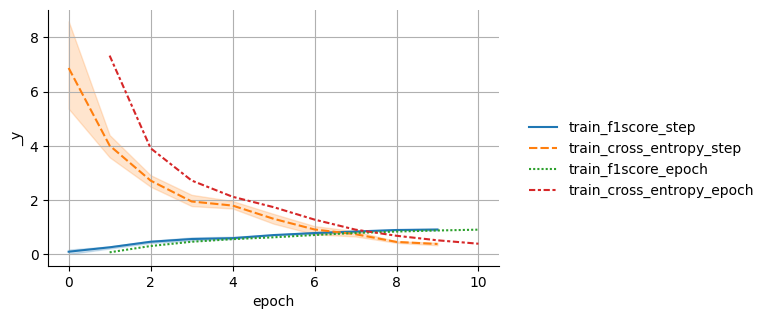

In [27]:
metrics = pd.read_csv(f'{trainer.logger.log_dir}/metrics.csv')
del metrics["step"]
metrics.set_index("epoch", inplace=True)
# display(metrics.dropna(axis=1, how="all").head())
g = sn.relplot(data=metrics, kind="line")
plt.gcf().set_size_inches(8, 3)
plt.grid()

## Inference 🎉

In [22]:
test_images = pd.DataFrame(test_data).set_index("image_id")
display(test_images.head())
print(f"inference for {len(test_images)} images")

,file_name,license
image_id,,
0,000/test-000000.jpg,0
1,000/test-000001.jpg,0
2,000/test-000002.jpg,0
3,000/test-000003.jpg,0
4,000/test-000004.jpg,0


inference for 210407 images


In [23]:
datamodule = ImageClassificationData.from_data_frame(
    input_field="file_name",
    # target_fields="category_id",
    predict_data_frame=test_images,
    # for simplicity take just fraction of the data
    # predict_data_frame=test_images[:len(test_images) // 100],
    predict_images_root=os.path.join(PATH_DATASET, "test_images"),
    batch_size=16,
    transform_kwargs={"image_size": (224, 224)},
    num_workers=2,
)

In [24]:
predictions = []
for lbs in trainer.predict(model, datamodule=datamodule, output="labels"):
    # lbs = [torch.argmax(p["preds"].float()).item() for p in preds]
    predictions += lbs

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
/home/jirka/.local/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:240: PossibleUserWarning: The dataloader, predict_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 255 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 5383it [00:00, ?it/s]

/home/jirka/.local/lib/python3.8/site-packages/flash/core/classification.py:237: UserWarning: No labels were provided, this output will act as a Classes output.
  rank_zero_warn("No labels were provided, this output will act as a Classes output.", category=UserWarning)


In [25]:
submission = pd.DataFrame({"id": test_images.index, "Predicted": predictions}).set_index("id")
submission.to_csv("submission.csv")

! head submission.csv

id,Predicted
0,1729
1,12781
2,10793
3,13326
4,511
5,3005
6,8124
7,5955
8,8413
